Resultado da otimização:
Ponto ótimo: [0.60837425 1.09624044 1.3669776 ]
Valor mínimo de R(X): 0.19806226425150814
Número de Iterações: 4
Número de Avaliações da Função: 5


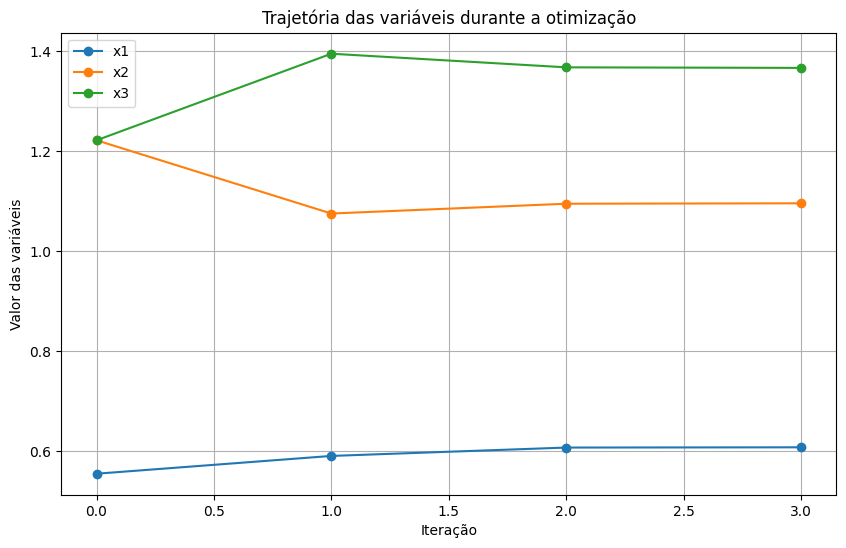

In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Matrizes K e M
def get_matrizes(k=1):
    K = k * np.array([[2, -1, 0],
                      [-1, 2, -1],
                      [0, -1, 1]])
    M = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
    return K, M

# Definição da função objetivo R(X)
def R(X):
    K, M = get_matrizes(k=1)
    X = np.array(X).reshape(-1, 1)
    numerator = (X.T @ K @ X)[0, 0]  # X^T K X
    denominator = (X.T @ M @ X)[0, 0]  # X^T M X
    return numerator / denominator

# Gradiente da função objetivo R(X)
def grad_R(X):
    K, M = get_matrizes(k=1)
    X = np.array(X).reshape(-1, 1)
    numerator_grad = 2 * (K @ X)
    denominator_grad = 2 * (M @ X)
    numerator = (X.T @ K @ X)[0, 0]  # X^T K X
    denominator = (X.T @ M @ X)[0, 0]  # X^T M X
    gradient = (numerator_grad / denominator) - (numerator / (denominator**2)) * denominator_grad
    return gradient.flatten()

# Ponto inicial
x0 = [1, 1, 1]

# Callback para salvar a trajetória
trajectory = []
def callback(x):
    trajectory.append(x.tolist())

# Minimização usando o método BFGS
result = minimize(R,
                  x0=x0,
                  method='BFGS',
                  jac=grad_R,
                  callback=callback,
                  tol=1e-5,
                  options={'maxiter': 100})

# Resultados da otimização
print("Resultado da otimização:")
print("Ponto ótimo:", result.x)
print("Valor mínimo de R(X):", result.fun)
print("Número de Iterações:", result.nit)
print("Número de Avaliações da Função:", result.nfev)

# Plotar a trajetória das variáveis durante a otimização
trajectory = np.array(trajectory)
plt.figure(figsize=(10, 6))
plt.plot(trajectory[:, 0], label='x1', marker='o')
plt.plot(trajectory[:, 1], label='x2', marker='o')
plt.plot(trajectory[:, 2], label='x3', marker='o')
plt.title('Trajetória das variáveis durante a otimização')
plt.xlabel('Iteração')
plt.ylabel('Valor das variáveis')
plt.legend()
plt.grid()
plt.show()
